In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
image_list = pd.read_csv("driver_imgs_list.csv")

In [3]:
image_list.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [4]:
image_list.tail()

,subject,classname,img
22419,p081,c9,img_56936.jpg
22420,p081,c9,img_46218.jpg
22421,p081,c9,img_25946.jpg
22422,p081,c9,img_67850.jpg
22423,p081,c9,img_9684.jpg


In [5]:
image_list['classname'].unique()
#The training data set is organized into 10 folders representing 10 classes - c0 to c9

array(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'],
      dtype=object)

Found 22424 images belonging to 10 classes.


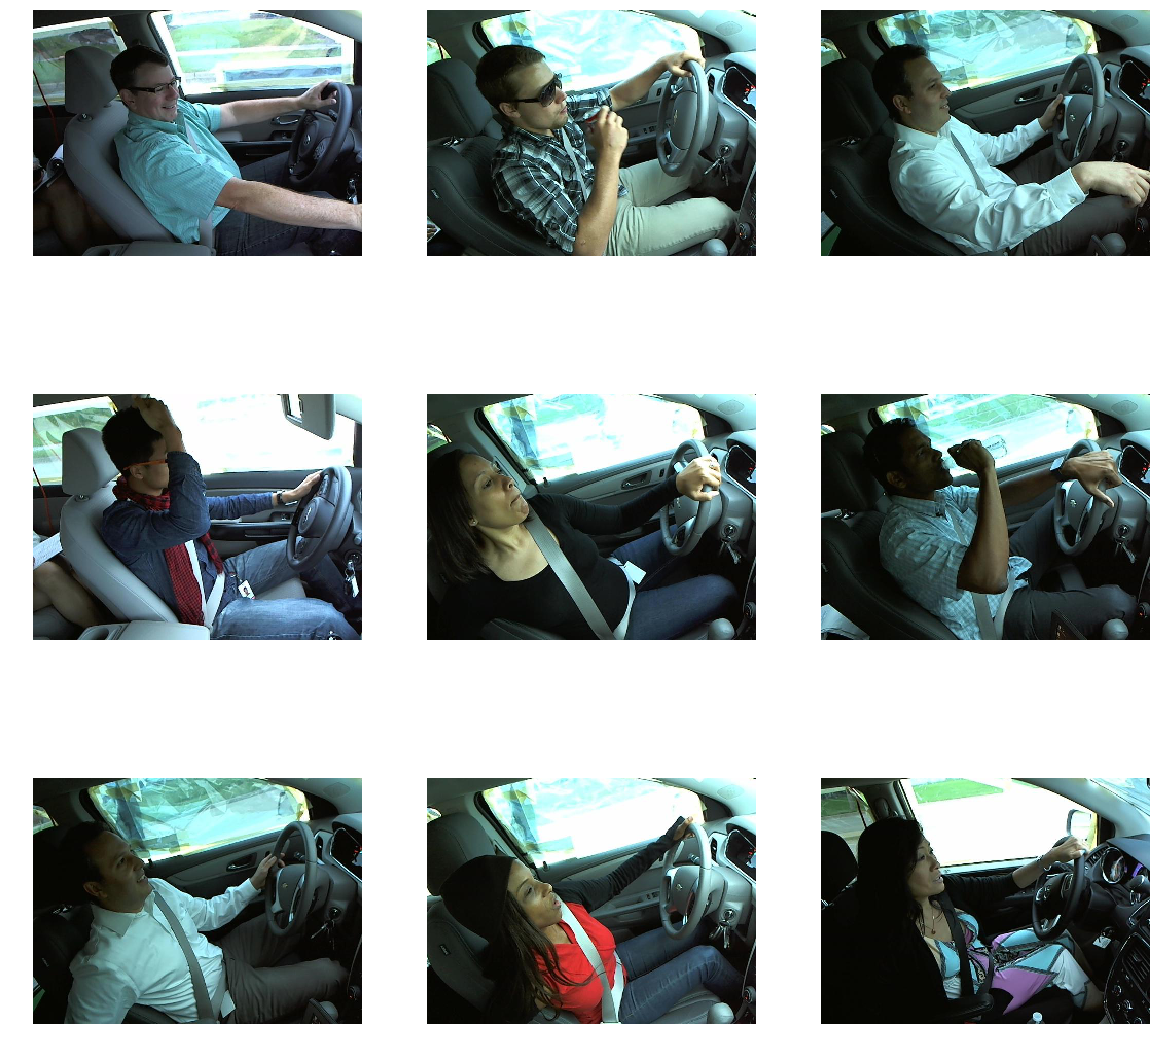

In [42]:
original_data = ImageDataGenerator(rescale=1./255)
for X_train, y_train in original_data.flow_from_directory(
        'train',
        target_size=(240, 320),
        batch_size=32,
        class_mode='categorical'):
  #A sample of the original images in the data set (rescaled)
  plt.figure(figsize=(20,20))
  plt.axis('off')
  for i in range(0, 9):
      plt.subplot(330 + 1 + i)
      plt.imshow(X_train[i])
      plt.axis('off')
  plt.show()
  break
#there are 22,424 images in the training set, belonging to 10 classes. Each of the classes are representative of a 
#specific driver action, e.g. safe driving, eating/drinking, reaching behind, etc.
#a sample of the original images from different classes are shown below

In [0]:
#Training set - Image augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range = 30,
        shear_range=0.2,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        brightness_range=[0.5, 1.5],
        horizontal_flip=True)

#Just rescale test set
test_datagen = ImageDataGenerator(rescale=1./255)

Found 22424 images belonging to 10 classes.


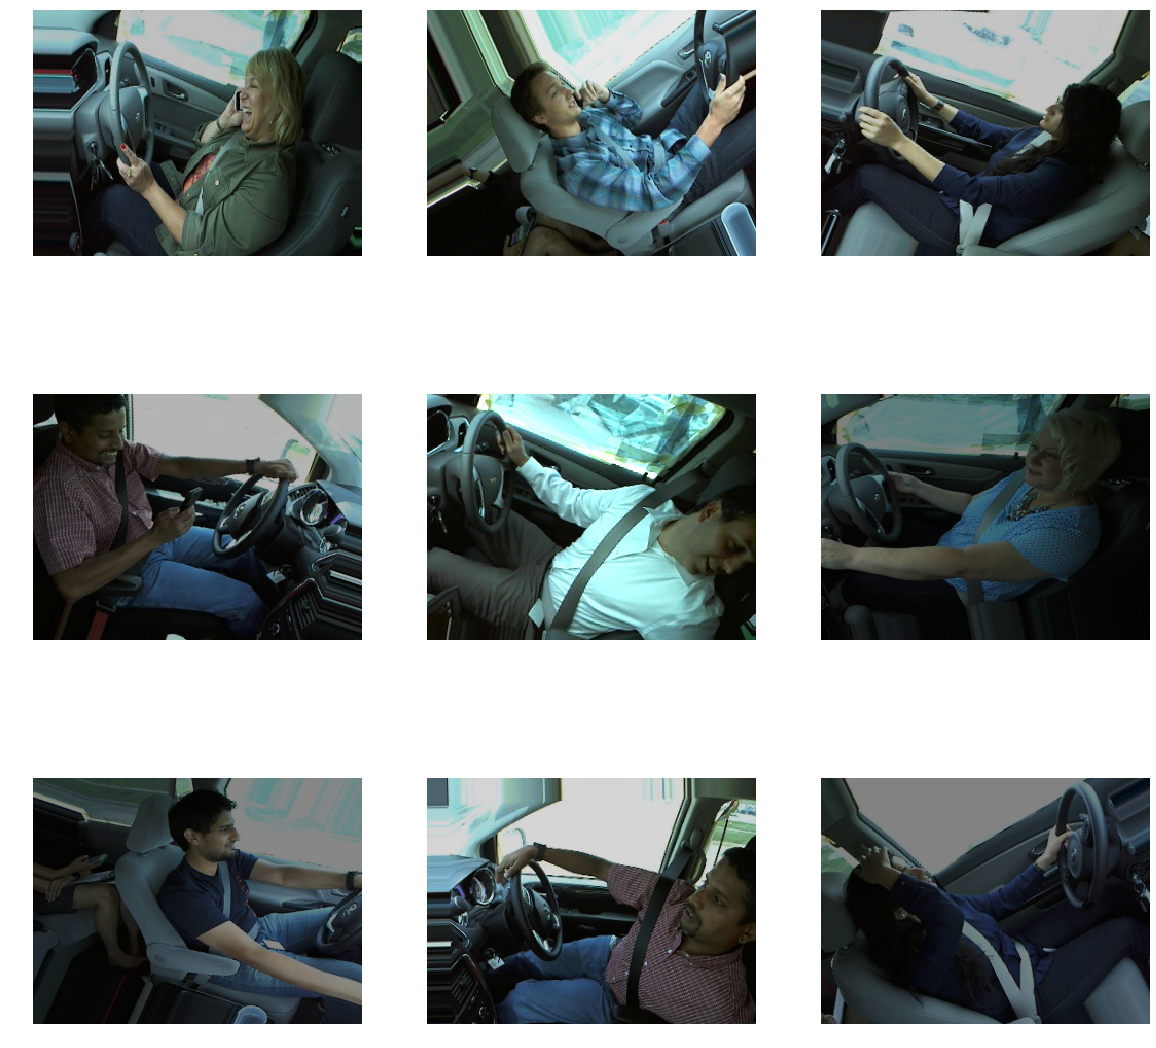

In [47]:
#grab images from the directory with a batch size of 32 and resize images to 240x320
for X_train, y_train in train_datagen.flow_from_directory(
        'train',
        target_size=(240, 320),
        batch_size=32,
        class_mode='categorical'):
  #display a sample of images to illustrate augmentation
  plt.figure(figsize=(20,20))
  plt.axis('off')
  for i in range(0, 9):
      plt.subplot(330 + 1 + i)
      plt.imshow(X_train[i])
      plt.axis('off')
  plt.show()
  break
  

In [14]:
test_data = test_datagen.flow_from_directory(
        '/content/.',
        target_size=(256, 256),
        batch_size=32,
        classes=['test'])
#The image test set has 79,726 unlabelled images

Found 79726 images belonging to 1 classes.
